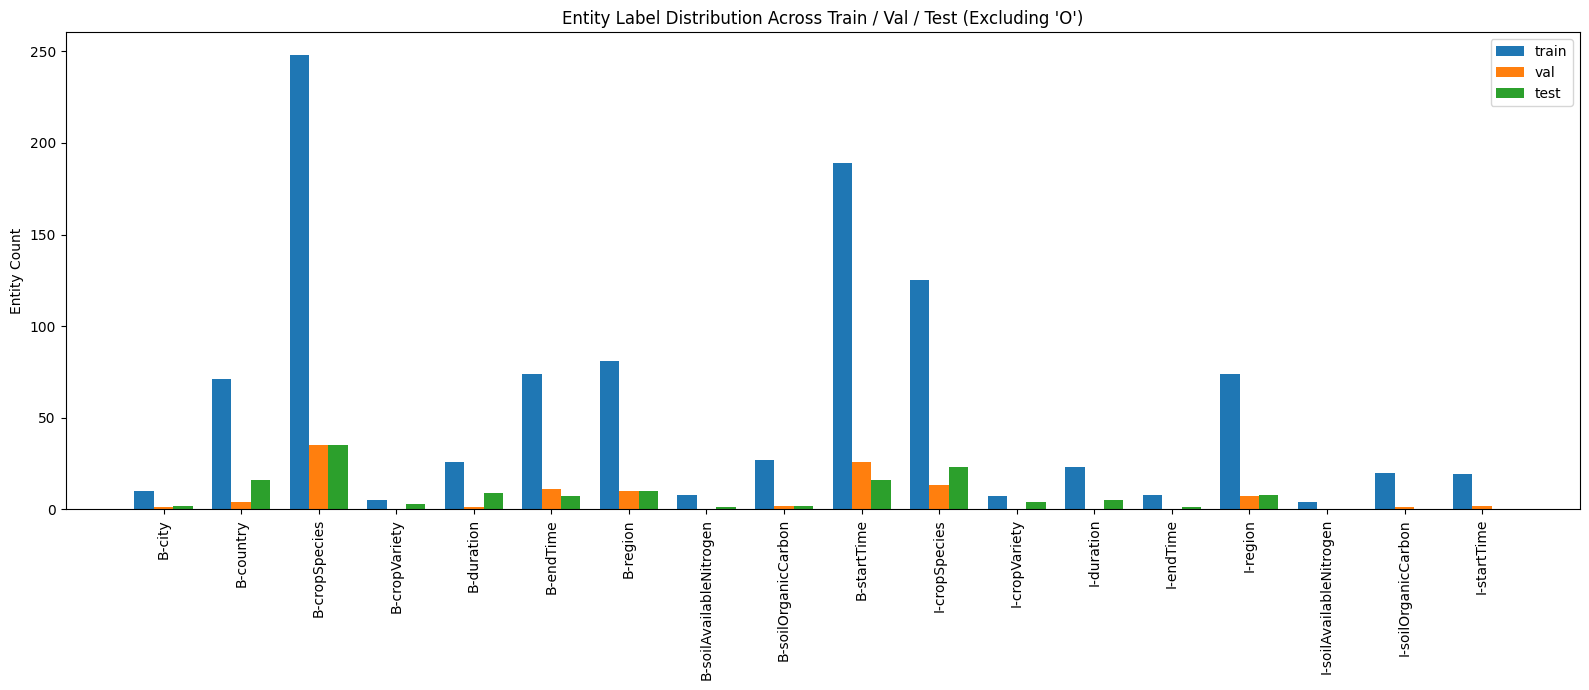

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Label list for mapping indices to names
label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]

# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/bonares_ner_dataset_sentence_train.json",
    "val": f"{base_path}/bonares_ner_dataset_sentence_val.json",
    "test": f"{base_path}/bonares_ner_dataset_sentence_test.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels per split
split_counts = {split: count_labels(path) for split, path in splits.items()}

# All labels excluding 'O', sorted for consistent order
all_labels = sorted(set().union(*[counter.keys() for counter in split_counts.values()]))

# Plotting
x = range(len(all_labels))
width = 0.25
fig, ax = plt.subplots(figsize=(16, 7))

for i, (split, counter) in enumerate(split_counts.items()):
    values = [counter.get(label, 0) for label in all_labels]
    ax.bar([xi + i * width for xi in x], values, width=width, label=split)

# Formatting
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(all_labels, rotation=90)
ax.set_ylabel("Entity Count")
ax.set_title("Entity Label Distribution Across Train / Val / Test (Excluding 'O')")
ax.legend()
plt.tight_layout()
plt.show()


In [4]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]

# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/ner_dataset_sentence_train.json",
    "val": f"{base_path}/ner_dataset_sentence_val.json",
    "test": f"{base_path}/ner_dataset_sentence_test.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                      2    10   1      1.41%   0.98%   0.88%
B-country                  16    71   4     11.27%   6.97%   3.54%
B-cropSpecies              35   248  35     24.65%  24.34%  30.97%
B-cropVariety               3     5   0      2.11%   0.49%       0
B-duration                  9    26   1      6.34%   2.55%   0.88%
B-endTime                   7    74  11      4.93%   7.26%   9.73%
B-region                   10    81  10      7.04%   7.95%   8.85%
B-soilAvailableNitrogen     1     8   0      0.70%   0.79%       0
B-soilOrganicCarbon         2    27   2      1.41%   2.65%   1.77%
B-startTime                16   189  26     11.27%  18.55%  23.01%
I-cropSpecies              23   125  13     16.20%  12.27%  11.50%
I-cropVariety               4     7   0      2.82%   0.69%    

/tmp/ipykernel_2020716/4146264231.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [2]:
import json
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# === Configuration ===
base_path = "/home/s27mhusa_hpc/Master-Thesis/Dataset-25-July-Document-Level"
input_path = f"{base_path}/Combined_ner_dataset_document.json"  # Replace with your actual file name
output_prefix = "Combine_ner_dataset_document"
label_list = ["O","B-soilReferenceGroup","I-soilReferenceGroup", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# === Load data ===
with open(input_path, encoding="utf-8") as f:
    data = json.load(f)
print(f"Loaded {len(data)} examples from {input_path}")

label_count = len(label_list)

# === Convert to multi-hot vectors (excluding 'O' tag which is index 0) ===
def get_multi_hot_vector(ner_tags):
    tags = set(ner_tags)
    vec = [0] * label_count
    for tag in tags:
        if tag != 0:
            vec[tag] = 1
    return vec

X = data
y = np.array([get_multi_hot_vector(item["ner_tags"]) for item in data])

# === Stratified K-Fold ===
mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=42)
splits = list(mskf.split(X, y))

# Use 1 fold for test, 1 for val, and the rest for train
val_indices = splits[0][1]
train_indices = list(set(range(len(X)))  - set(val_indices))

assert len(train_indices) + len(val_indices) == len(X)

# === Create split datasets ===
train_data = [X[i] for i in train_indices]
val_data = [X[i] for i in val_indices]

# === Save splits ===
for name, dataset in [("train", train_data), ("val", val_data)]:
    out_path = f"{base_path}/{output_prefix}_{name}_stratified.json"
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(dataset, f, indent=2, ensure_ascii=False)
    print(f"Saved {name} set with {len(dataset)} examples → {out_path}")

# === Final sanity check ===
total = len(train_data) + len(val_data) 
print(f"\n✅ Total samples after split: {total} (should equal {len(data)})")


Loaded 324 examples from /home/s27mhusa_hpc/Master-Thesis/Dataset-25-July-Document-Level/Combined_ner_dataset_document.json
Saved train set with 292 examples → /home/s27mhusa_hpc/Master-Thesis/Dataset-25-July-Document-Level/Combine_ner_dataset_document_train_stratified.json
Saved val set with 32 examples → /home/s27mhusa_hpc/Master-Thesis/Dataset-25-July-Document-Level/Combine_ner_dataset_document_val_stratified.json

✅ Total samples after split: 324 (should equal 324)


In [3]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = ["O","B-soilReferenceGroup","I-soilReferenceGroup", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/Dataset-25-July-Document-Level/Combine_ner_dataset_document_train_stratified.json",
    "val": f"{base_path}/Dataset-25-July-Document-Level/Combine_ner_dataset_document_val_stratified.json",
    "test": f"{base_path}/Dataset-25-July-Document-Level/Test_ner_dataset_document.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                     24    74   5      4.79%   3.60%   2.30%
B-country                  24    80  11      4.79%   3.89%   5.07%
B-cropSpecies              91   266  42     18.16%  12.93%  19.35%
B-cropVariety              14    84   5      2.79%   4.08%   2.30%
B-duration                 13   120  16      2.59%   5.83%   7.37%
B-endTime                  23   184  18      4.59%   8.95%   8.29%
B-latitude                  4     6   0      0.80%   0.29%       0
B-longitude                 4     4   0      0.80%   0.19%       0
B-region                   14   151  20      2.79%   7.34%   9.22%
B-soilAvailableNitrogen     3    14   3      0.60%   0.68%   1.38%
B-soilBulkDensity           1     1   0      0.20%   0.05%       0
B-soilDepth                20    76   6      3.99%   3.69%   2

/tmp/ipykernel_2241673/1337199033.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [11]:
import json
import random
from collections import Counter, defaultdict

# === Config ===
input_path = "/home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence.json"
base_path = "/home/s27mhusa_hpc/Master-Thesis"
output_prefix = "ner_dataset_sentence_manual"
random.seed(42)

# Label list
label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]
non_o_labels = set(range(1, len(label_list)))  # Exclude "O" which is 0

# === Load dataset ===
with open(input_path, "r", encoding="utf-8") as f:
    data = json.load(f)
print(f"Loaded {len(data)} sentences.")

# === Step 1: Track token-level label coverage ===
label_to_sent_ids = defaultdict(set)
for idx, item in enumerate(data):
    for tag in item["ner_tags"]:
        if tag != 0:
            label_to_sent_ids[tag].add(idx)

# === Step 2: Manually enforce minimum 1 example per label per split ===
split_sets = {
    "train": set(),
    "val": set(),
    "test": set()
}
used_sent_ids = set()

for label_id in non_o_labels:
    candidates = list(label_to_sent_ids[label_id])
    random.shuffle(candidates)
    for split_name in ["train", "val", "test"]:
        for sent_id in candidates:
            if sent_id not in used_sent_ids:
                split_sets[split_name].add(sent_id)
                used_sent_ids.add(sent_id)
                break  # Only one per split per label

# === Step 3: Fill remaining splits by proportion ===
remaining = list(set(range(len(data))) - used_sent_ids)
random.shuffle(remaining)

n_total = len(data)
target_train = int(0.8 * n_total) - len(split_sets["train"])
target_val = int(0.1 * n_total) - len(split_sets["val"])
target_test = n_total - sum(len(s) for s in split_sets.values()) - target_train - target_val

split_sets["train"].update(remaining[:target_train])
split_sets["val"].update(remaining[target_train:target_train + target_val])
split_sets["test"].update(remaining[target_train + target_val:])

# === Final splits ===
train_data = [data[i] for i in split_sets["train"]]
val_data = [data[i] for i in split_sets["val"]]
test_data = [data[i] for i in split_sets["test"]]

# === Save splits ===
for name, dataset in [("train", train_data), ("val", val_data), ("test", test_data)]:
    out_path = f"{base_path}/{output_prefix}_{name}_token_minlabel.json"
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(dataset, f, indent=2, ensure_ascii=False)
    print(f"✅ Saved {name} set with {len(dataset)} examples → {out_path}")

# === Token-level label coverage ===
def token_level_label_stats(dataset):
    counter = Counter()
    for item in dataset:
        for tag in item["ner_tags"]:
            if tag != 0:
                counter[label_list[tag]] += 1
    total = sum(counter.values())
    for label in sorted(counter, key=counter.get, reverse=True):
        pct = 100 * counter[label] / total
        print(f"{label:25} : {counter[label]:5} ({pct:.2f}%)")

print("\n📊 Token-level Label Distribution")
print("Train:")
token_level_label_stats(train_data)
print("\nVal:")
token_level_label_stats(val_data)
print("\nTest:")
token_level_label_stats(test_data)

# === Sanity check ===
print(f"\n✅ Total unique sentences used: {len(train_data) + len(val_data) + len(test_data)} (should equal {n_total})")


Loaded 2067 sentences.
✅ Saved train set with 1653 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence_manual_train_token_minlabel.json
✅ Saved val set with 206 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence_manual_val_token_minlabel.json
✅ Saved test set with 208 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence_manual_test_token_minlabel.json

📊 Token-level Label Distribution
Train:
B-cropSpecies             :   276 (25.46%)
B-startTime               :   200 (18.45%)
I-cropSpecies             :   133 (12.27%)
B-endTime                 :    83 (7.66%)
B-country                 :    78 (7.20%)
B-region                  :    75 (6.92%)
I-region                  :    68 (6.27%)
B-duration                :    35 (3.23%)
I-startTime               :    29 (2.68%)
I-duration                :    28 (2.58%)
B-soilOrganicCarbon       :    14 (1.29%)
I-endTime                 :    12 (1.11%)
I-soilOrganicCarbon       :    10 (0.92%)
B-city           

In [13]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]

# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/ner_dataset_sentence_manual_train_token_minlabel.json",
    "val": f"{base_path}/ner_dataset_sentence_manual_val_token_minlabel.json",
    "test": f"{base_path}/ner_dataset_sentence_manual_test_token_minlabel.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                      7     9   6      4.29%   0.83%   2.70%
B-country                  13    78  13      7.98%   7.20%   5.86%
B-cropSpecies              30   276  28     18.40%  25.46%  12.61%
B-cropVariety               2     9   1      1.23%   0.83%   0.45%
B-duration                  3    35   9      1.84%   3.23%   4.05%
B-endTime                   7    83  17      4.29%   7.66%   7.66%
B-latitude                  0     2   2          0   0.18%   0.90%
B-longitude                 0     2   2          0   0.18%   0.90%
B-region                   18    75  20     11.04%   6.92%   9.01%
B-soilAvailableNitrogen     3     4   4      1.84%   0.37%   1.80%
B-soilBulkDensity           0     2   0          0   0.18%       0
B-soilDepth                 0     1   1          0   0.09%   0

/tmp/ipykernel_2020716/3626978461.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [16]:
import json
import random
from collections import defaultdict

with open("/home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence.json", "r", encoding="utf-8") as f:
    full_data = json.load(f)

label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]

non_o_ids = [i for i in range(len(label_list)) if i != 0]

label_to_sentences = defaultdict(set)
for i, item in enumerate(full_data):
    for tag in set(item["ner_tags"]):
        if tag != 0:
            label_to_sentences[tag].add(i)

used = set()
splits = {"train": set(), "val": set(), "test": set()}

for tag in non_o_ids:
    ids = list(label_to_sentences[tag])
    random.shuffle(ids)
    for split in ["train", "val", "test"]:
        for sid in ids:
            if sid not in used:
                splits[split].add(sid)
                used.add(sid)
                break

# Fill remaining data
remaining = list(set(range(len(full_data))) - used)
random.shuffle(remaining)

target_counts = {
    "train": int(0.8 * len(full_data)) - len(splits["train"]),
    "val": int(0.1 * len(full_data)) - len(splits["val"]),
    "test": int(0.1 * len(full_data)) - len(splits["test"]),
}

splits["train"].update(remaining[:target_counts["train"]])
splits["val"].update(remaining[target_counts["train"]:target_counts["train"] + target_counts["val"]])
splits["test"].update(remaining[target_counts["train"] + target_counts["val"]:])

# Save new datasets
for split_name in ["train", "val", "test"]:
    split_data = [full_data[i] for i in splits[split_name]]
    with open(f"/home/s27mhusa_hpc/Master-Thesis/ner_dataset_sentence_{split_name}_strict.json", "w", encoding="utf-8") as f:
        json.dump(split_data, f, indent=2, ensure_ascii=False)


In [17]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = [
    "O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-startTime", "I-startTime", "B-endTime", "I-endTime",
    "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen",
    "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country",
    "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH",
    "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"
]

# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/ner_dataset_sentence_train_strict.json",
    "val": f"{base_path}/ner_dataset_sentence_val_strict.json",
    "test": f"{base_path}/ner_dataset_sentence_test_strict.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                      3    14   5      2.00%   1.23%   2.82%
B-country                  14    79  11      9.33%   6.92%   6.21%
B-cropSpecies              36   277  21     24.00%  24.26%  11.86%
B-cropVariety               1     5   6      0.67%   0.44%   3.39%
B-duration                  9    34   4      6.00%   2.98%   2.26%
B-endTime                   6    87  14      4.00%   7.62%   7.91%
B-latitude                  0     2   2          0   0.18%   1.13%
B-longitude                 0     2   2          0   0.18%   1.13%
B-region                    9    95   9      6.00%   8.32%   5.08%
B-soilAvailableNitrogen     1     8   2      0.67%   0.70%   1.13%
B-soilBulkDensity           0     1   1          0   0.09%   0.56%
B-soilDepth                 0     1   1          0   0.09%   0

/tmp/ipykernel_2020716/3479030568.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [2]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = ["O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/combined_ner_dataset_sentence_train.json",
    "val": f"{base_path}/combined_ner_dataset_sentence_val.json",
    "test": f"{base_path}/bonares_ner_dataset_sentence_test_stratified.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                      5    40   6      4.72%   3.05%   2.76%
B-country                   5    15   4      4.72%   1.15%   1.84%
B-cropSpecies              23    59  17     21.70%   4.50%   7.83%
B-cropVariety               4     9   1      3.77%   0.69%   0.46%
B-duration                  4   254  38      3.77%  19.39%  17.51%
B-endTime                   4    24   6      3.77%   1.83%   2.76%
B-latitude                  1     7   1      0.94%   0.53%   0.46%
B-longitude                 1     2   1      0.94%   0.15%   0.46%
B-region                    3    79   7      2.83%   6.03%   3.23%
B-soilAvailableNitrogen     0     3   0          0   0.23%       0
B-soilBulkDensity           0     1   0          0   0.08%       0
B-soilDepth                 3    95  13      2.83%   7.25%   5

/tmp/ipykernel_191723/156805863.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [4]:
import json
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# === Configuration ===
base_path = "/home/s27mhusa_hpc/Master-Thesis"
input_path = f"{base_path}/ner_dataset_combined.json"  # Replace with your actual file name
output_prefix = "ner_dataset_combined_sentence"
label_list = ["O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# === Load data ===
with open(input_path, encoding="utf-8") as f:
    data = json.load(f)
print(f"Loaded {len(data)} examples from {input_path}")

label_count = len(label_list)

# === Convert to multi-hot vectors (excluding 'O' tag which is index 0) ===
def get_multi_hot_vector(ner_tags):
    tags = set(ner_tags)
    vec = [0] * label_count
    for tag in tags:
        if tag != 0:
            vec[tag] = 1
    return vec

X = data
y = np.array([get_multi_hot_vector(item["ner_tags"]) for item in data])

# === Stratified K-Fold ===
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = list(mskf.split(X, y))

# Use 1 fold for test, 1 for val, and the rest for train
test_indices = splits[0][1]
val_indices = splits[1][1]
train_indices = list(set(range(len(X))) - set(test_indices) - set(val_indices))

assert len(train_indices) + len(val_indices) + len(test_indices) == len(X)

# === Create split datasets ===
train_data = [X[i] for i in train_indices]
val_data = [X[i] for i in val_indices]
test_data = [X[i] for i in test_indices]

# === Save splits ===
for name, dataset in [("train", train_data), ("val", val_data), ("test", test_data)]:
    out_path = f"{base_path}/{output_prefix}_{name}_stratified.json"
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(dataset, f, indent=2, ensure_ascii=False)
    print(f"Saved {name} set with {len(dataset)} examples → {out_path}")

# === Final sanity check ===
total = len(train_data) + len(val_data) + len(test_data)
print(f"\n✅ Total samples after split: {total} (should equal {len(data)})")


Loaded 2458 examples from /home/s27mhusa_hpc/Master-Thesis/ner_dataset_combined.json
Saved train set with 1475 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_combined_sentence_train_stratified.json
Saved val set with 492 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_combined_sentence_val_stratified.json
Saved test set with 491 examples → /home/s27mhusa_hpc/Master-Thesis/ner_dataset_combined_sentence_test_stratified.json

✅ Total samples after split: 2458 (should equal 2458)


In [5]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = ["O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/ner_dataset_combined_sentence_train_stratified.json",
    "val": f"{base_path}/ner_dataset_combined_sentence_val_stratified.json",
    "test": f"{base_path}/ner_dataset_combined_sentence_test_stratified.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count            Percentage                
Split                    test train  val       test   train     val
Label                                                              
B-city                     12    47   12      3.28%   4.04%   2.72%
B-country                   7    16    5      1.91%   1.38%   1.13%
B-cropSpecies              18    58   26      4.92%   4.99%   5.90%
B-cropVariety               4    10    2      1.09%   0.86%   0.45%
B-duration                 66   181  100     18.03%  15.56%  22.68%
B-endTime                   8    29    8      2.19%   2.49%   1.81%
B-latitude                  4    10    2      1.09%   0.86%   0.45%
B-longitude                 1     5    2      0.27%   0.43%   0.45%
B-region                   24    72   22      6.56%   6.19%   4.99%
B-soilAvailableNitrogen     0     5    0          0   0.43%       0
B-soilBulkDensity           0     1    0          0   0.09%       0
B-soilDepth                23    79   31      6.

/tmp/ipykernel_191723/3529761113.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))


In [4]:
import json
import random
from collections import Counter, defaultdict

# === Config ===
input_path = "/home/s27mhusa_hpc/Master-Thesis/combined_ner_dataset.json"
base_path = "/home/s27mhusa_hpc/Master-Thesis"
output_prefix = "combined_ner_dataset_combined_manual"
random.seed(42)

# Label list
label_list = ["O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]

non_o_labels = set(range(1, len(label_list)))  # Exclude "O" which is 0

# === Load dataset ===
with open(input_path, "r", encoding="utf-8") as f:
    data = json.load(f)
print(f"Loaded {len(data)} sentences.")

# === Step 1: Track token-level label coverage ===
label_to_sent_ids = defaultdict(set)
for idx, item in enumerate(data):
    for tag in item["ner_tags"]:
        if tag != 0:
            label_to_sent_ids[tag].add(idx)

# === Step 2: Manually enforce minimum 1 example per label per split ===
split_sets = {
    "train": set(),
    "val": set(),
    "test": set()
}
used_sent_ids = set()

for label_id in non_o_labels:
    candidates = list(label_to_sent_ids[label_id])
    random.shuffle(candidates)
    for split_name in ["train", "val", "test"]:
        for sent_id in candidates:
            if sent_id not in used_sent_ids:
                split_sets[split_name].add(sent_id)
                used_sent_ids.add(sent_id)
                break  # Only one per split per label

# === Step 3: Fill remaining splits by proportion ===
remaining = list(set(range(len(data))) - used_sent_ids)
random.shuffle(remaining)

n_total = len(data)
target_train = int(0.8 * n_total) - len(split_sets["train"])
target_val = int(0.1 * n_total) - len(split_sets["val"])
target_test = n_total - sum(len(s) for s in split_sets.values()) - target_train - target_val

split_sets["train"].update(remaining[:target_train])
split_sets["val"].update(remaining[target_train:target_train + target_val])
split_sets["test"].update(remaining[target_train + target_val:])

# === Final splits ===
train_data = [data[i] for i in split_sets["train"]]
val_data = [data[i] for i in split_sets["val"]]
test_data = [data[i] for i in split_sets["test"]]

# === Save splits ===
for name, dataset in [("train", train_data), ("val", val_data), ("test", test_data)]:
    out_path = f"{base_path}/{output_prefix}_{name}_token_minlabel.json"
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(dataset, f, indent=2, ensure_ascii=False)
    print(f"✅ Saved {name} set with {len(dataset)} examples → {out_path}")

# === Token-level label coverage ===
def token_level_label_stats(dataset):
    counter = Counter()
    for item in dataset:
        for tag in item["ner_tags"]:
            if tag != 0:
                counter[label_list[tag]] += 1
    total = sum(counter.values())
    for label in sorted(counter, key=counter.get, reverse=True):
        pct = 100 * counter[label] / total
        print(f"{label:25} : {counter[label]:5} ({pct:.2f}%)")

print("\n📊 Token-level Label Distribution")
print("Train:")
token_level_label_stats(train_data)
print("\nVal:")
token_level_label_stats(val_data)
print("\nTest:")
token_level_label_stats(test_data)

# === Sanity check ===
print(f"\n✅ Total unique sentences used: {len(train_data) + len(val_data) + len(test_data)} (should equal {n_total})")


Loaded 2458 sentences.
✅ Saved train set with 1966 examples → /home/s27mhusa_hpc/Master-Thesis/combined_ner_dataset_combined_manual_train_token_minlabel.json
✅ Saved val set with 245 examples → /home/s27mhusa_hpc/Master-Thesis/combined_ner_dataset_combined_manual_val_token_minlabel.json
✅ Saved test set with 247 examples → /home/s27mhusa_hpc/Master-Thesis/combined_ner_dataset_combined_manual_test_token_minlabel.json

📊 Token-level Label Distribution
Train:
B-cropSpecies             :   311 (22.31%)
B-startTime               :   219 (15.71%)
I-cropSpecies             :   143 (10.26%)
B-region                  :   102 (7.32%)
B-country                 :   101 (7.25%)
B-endTime                 :    98 (7.03%)
I-region                  :    87 (6.24%)
I-duration                :    41 (2.94%)
B-duration                :    37 (2.65%)
B-city                    :    35 (2.51%)
B-soilOrganicCarbon       :    34 (2.44%)
I-soilOrganicCarbon       :    29 (2.08%)
I-startTime               :    2

In [6]:
import json
from collections import Counter
import pandas as pd

# Label list for mapping indices to names
label_list = ["O", "B-soilOrganicCarbon", "I-soilOrganicCarbon", "B-soilTexture", "I-soilTexture", "B-startTime", "I-startTime", "B-endTime", "I-endTime", "B-city", "I-city", "B-duration", "I-duration", "B-cropSpecies", "I-cropSpecies", "B-soilAvailableNitrogen", "I-soilAvailableNitrogen", "B-soilDepth", "I-soilDepth", "B-region", "I-region", "B-country", "I-country", "B-longitude", "I-longitude", "B-latitude", "I-latitude", "B-cropVariety", "I-cropVariety", "B-soilPH", "I-soilPH", "B-soilBulkDensity", "I-soilBulkDensity"]


# Map index to label
index_to_label = {i: label for i, label in enumerate(label_list)}

# Dataset paths
base_path = "/home/s27mhusa_hpc/Master-Thesis"
splits = {
    "train": f"{base_path}/combined_ner_dataset_combined_manual_train_token_minlabel.json",
    "val": f"{base_path}/combined_ner_dataset_combined_manual_val_token_minlabel.json",
    "test": f"{base_path}/combined_ner_dataset_combined_manual_test_token_minlabel.json"
}

# Function to count labels in each split (excluding 'O')
def count_labels(filepath):
    with open(filepath, encoding="utf-8") as f:
        data = json.load(f)
    counter = Counter()
    for item in data:
        tags = [index_to_label[tag] for tag in item["ner_tags"] if index_to_label[tag] != "O"]
        counter.update(tags)
    return counter

# Count labels and calculate percentages
rows = []
for split_name, path in splits.items():
    counter = count_labels(path)
    total = sum(counter.values())
    for label in sorted(counter.keys()):
        count = counter[label]
        percentage = 100 * count / total if total > 0 else 0
        rows.append({
            "Split": split_name,
            "Label": label,
            "Count": count,
            "Percentage": f"{percentage:.2f}%"
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Print nicely
print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))

# Optionally save to CSV
csv_path = f"{base_path}/ner_entity_distribution.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved CSV to {csv_path}")


                        Count           Percentage                
Split                    test train val       test   train     val
Label                                                             
B-city                      6    35   5      1.98%   2.51%   1.83%
B-country                  18   101   9      5.94%   7.25%   3.30%
B-cropSpecies              61   311  53     20.13%  22.31%  19.41%
B-cropVariety               5    13   8      1.65%   0.93%   2.93%
B-duration                 14    37   9      4.62%   2.65%   3.30%
B-endTime                  17    98  15      5.61%   7.03%   5.49%
B-latitude                  1     4   3      0.33%   0.29%   1.10%
B-longitude                 1     4   3      0.33%   0.29%   1.10%
B-region                    9   102  16      2.97%   7.32%   5.86%
B-soilAvailableNitrogen     4     7   3      1.32%   0.50%   1.10%
B-soilBulkDensity           1     2   0      0.33%   0.14%       0
B-soilDepth                11     6   5      3.63%   0.43%   1

/tmp/ipykernel_2408391/3718247042.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df.pivot(index="Label", columns="Split", values=["Count", "Percentage"]).fillna(0))
